<a href="https://colab.research.google.com/github/jimmyliao/genai-gdg/blob/main/gemini/img_gemini2_flash_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.environ["GEMINI_API_KEY"] = "YOUR_GEMINI_API_KEY"


File of mime type image/png savedto: surprise_generated.png


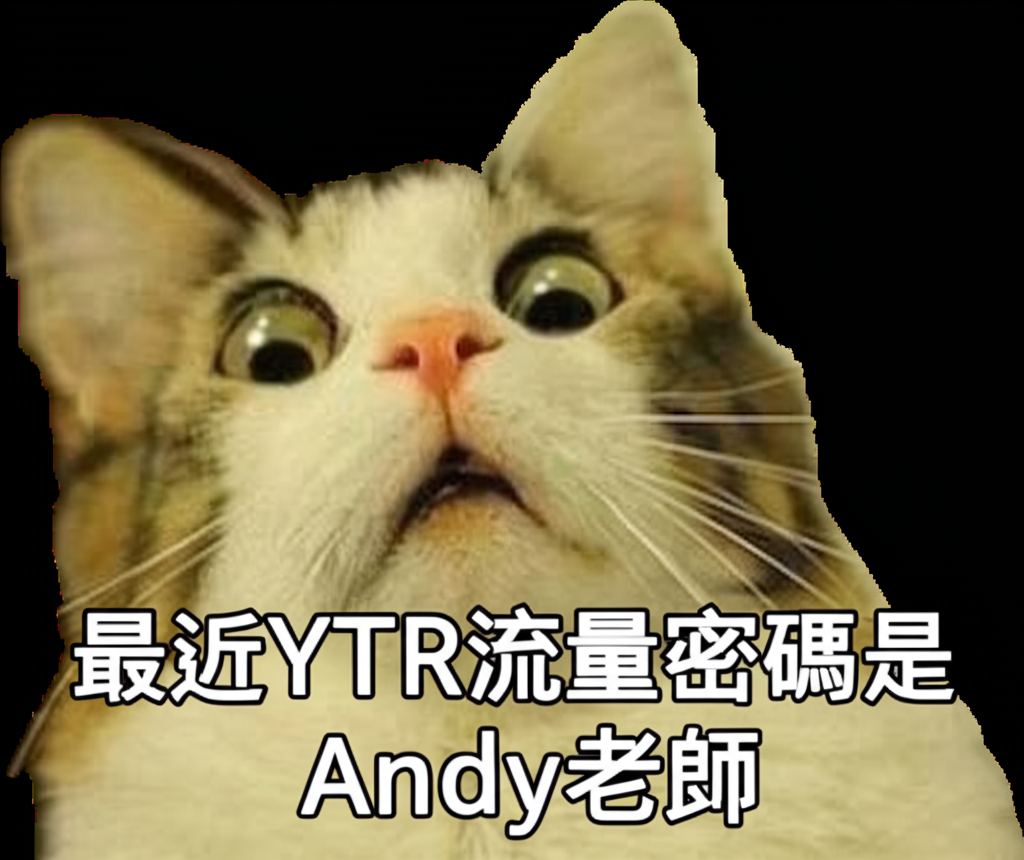

In [6]:
import base64
import os
from google import genai
from google.genai import types


def save_binary_file(file_name, data):
    f = open(file_name, "wb")
    f.write(data)
    f.close()


def generate():
    client = genai.Client(
        api_key=os.environ.get("GEMINI_API_KEY"),
    )

    files = [
        # Make the file available in local system working directory
        client.files.upload(file="surprise.png"),
    ]
    model = "gemini-2.0-flash-exp"
    contents = [
        types.Content(
            role="user",
            parts=[
                types.Part.from_uri(
                    file_uri=files[0].uri,
                    mime_type=files[0].mime_type,
                ),
                types.Part.from_text(text="""Please add text '最近YTR流量密碼是 Andy老師'"""),
                # types.Part.from_text(text="""把圖片上面新增「你好」"""),
                # types.Part.from_text(text="""INSERT_INPUT_HERE"""),
            ],
        ),
    ]
    generate_content_config = types.GenerateContentConfig(
        temperature=1,
        top_p=0.95,
        top_k=40,
        max_output_tokens=8192,
        response_modalities=[
            "image",
            "text",
        ],
        response_mime_type="text/plain",
    )

    for chunk in client.models.generate_content_stream(
        model=model,
        contents=contents,
        config=generate_content_config,
    ):
        if not chunk.candidates or not chunk.candidates[0].content or not chunk.candidates[0].content.parts:
            continue
        if chunk.candidates[0].content.parts[0].inline_data:
            file_name = "surprise_generated.png"
            save_binary_file(
                file_name, chunk.candidates[0].content.parts[0].inline_data.data
            )
            print(
                "File of mime type"
                f" {chunk.candidates[0].content.parts[0].inline_data.mime_type} saved"
                f"to: {file_name}"
            )
        else:
            print(chunk.text)

if __name__ == "__main__":
    generate()

# display image generated.png

import IPython
IPython.display.Image(filename='surprise_generated.png')